##Lab 5

# License Plate Generation

In [ ]:
import string
import random
from random import randint
import cv2
import numpy as np
import os
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
import re
import math

In [ ]:
# Run this command only once:

# makes the output folder /content/pictures/
!mkdir pictures

In [ ]:
# Run this command only once

# Downloads the license plate template to /content/blank_plate.png
!gdown --id 1Q_FsX2z6DaDCLM91qGZzwvctaW9bN60v

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Q_FsX2z6DaDCLM91qGZzwvctaW9bN60v
To: /content/blank_plate.png
100% 144k/144k [00:00<00:00, 66.2MB/s]


In [ ]:
path = "/content/"

NUMBER_OF_PLATES = 400

for i in range(0, NUMBER_OF_PLATES):

    # Pick two random letters
    plate_alpha = ""
    for _ in range(0, 2):
        plate_alpha += (random.choice(string.ascii_uppercase))

    # Pick two random numbers
    num = randint(0, 99)
    plate_num = "{:02d}".format(num)

    # Write plate to image
    blank_plate = cv2.imread(path+'blank_plate.png')

    # Convert into a PIL image (this is so we can use the monospaced fonts)
    blank_plate_pil = Image.fromarray(blank_plate)

    # Get a drawing context
    draw = ImageDraw.Draw(blank_plate_pil)
    monospace = ImageFont.truetype(font="/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf",
                                   size=165)
    draw.text(xy=(48, 75),
              text=plate_alpha + " " + plate_num,
              fill=(255,0,0), font=monospace)

    # Convert back to OpenCV image and save
    blank_plate = np.array(blank_plate_pil)

    # Write license plate to file
    cv2.imwrite(os.path.join(path + "pictures/",
                             "plate_{}{}.png".format(plate_alpha, plate_num)),
                             blank_plate)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#Load images

In [ ]:
Path = "/content/pictures"
labels_raw = !ls "{Path}"
file_names = labels_raw[0].split()
print(file_names)

def files_in_folder(folder_path):
  '''
  Returns a list of strings where each entry is a file in the folder_path.

  Parameters
  ----------

  folder_path : str
     A string to folder for which the file listing is returned.

  '''
  files_A = !ls "{folder_path}"
  # The files when listed from Google Drive have a particular format. They are
  # grouped in sets of 4 and have spaces and tabs as delimiters.

  # Split the string listing sets of 4 files by tab and space and remove any
  # empty splits.
  files_B = [list(filter(None, re.split('\t|\s', files))) for files in files_A]

  # Concatenate all splits into a single sorted list
  files_C = []
  for element in files_B:
    files_C = files_C + element
  files_C.sort()

  return files_C

files = files_in_folder(Path)
print(files)

['plate_AA05.png', 'plate_FN82.png', 'plate_KD97.png', 'plate_PH66.png', 'plate_UU20.png']
['plate_AA05.png', 'plate_AA72.png', 'plate_AB56.png', 'plate_AF17.png', 'plate_AF18.png', 'plate_AH20.png', 'plate_AJ43.png', 'plate_AJ50.png', 'plate_AK94.png', 'plate_AL53.png', 'plate_AM34.png', 'plate_AN71.png', 'plate_AO75.png', 'plate_AP08.png', 'plate_AR53.png', 'plate_AT41.png', 'plate_AT51.png', 'plate_AX68.png', 'plate_AY19.png', 'plate_AY95.png', 'plate_BA68.png', 'plate_BC68.png', 'plate_BE51.png', 'plate_BE65.png', 'plate_BJ05.png', 'plate_BJ32.png', 'plate_BK02.png', 'plate_BQ39.png', 'plate_BT34.png', 'plate_BT67.png', 'plate_BW05.png', 'plate_BW31.png', 'plate_BW39.png', 'plate_BW61.png', 'plate_BW98.png', 'plate_BX42.png', 'plate_CE39.png', 'plate_CG18.png', 'plate_CH15.png', 'plate_CI31.png', 'plate_CN63.png', 'plate_CP31.png', 'plate_CP60.png', 'plate_CR02.png', 'plate_CS08.png', 'plate_CV60.png', 'plate_CX58.png', 'plate_CX67.png', 'plate_DD67.png', 'plate_DH41.png', 'plate_D

# Get One-Hot detection

In [ ]:
# get the license plate images and the char list
images = []
chars = []

# create a function that converts a character into the corresponding one-hot array
def getArray(char):
  if ord(char) > 64:
    num = ord(char)-65
  else:
    num = ord(char)-22

  array = np.zeros(36)
  array[num] = 1
  return array.T

# cycle through the files to get images and letters
for element in files:

  img = cv2.imread(f'{Path}/{element}',cv2.IMREAD_GRAYSCALE)

  # create an list to store the characters in that license plate
  splitimg = []
  # constant determining where to start splitting horizontally
  letter_start = 47
  # splits the image into parts and stores the characeters in splitimg
  for i in range(0,5):
    splitimg.append(img[100:220,letter_start:letter_start+100])
    letter_start += 100
  # index 2 contains the BC flag so we remove that, just leaving characters
  splitimg.pop(2)

  # add to images array
  images.extend(splitimg)
  #plt.imshow(img)

  plate = []
  for i in range(6,10):
    plate.append(getArray(element[i]))

  #print(plate)

  chars.extend(plate)
  #print(chars)


In [ ]:
# X data is images
# Y data is chars

# Normalize X (images) dataset
datasize = int(np.asarray(images).size/(120*100))
X_dataset = (np.asarray(images)/255.0).reshape(datasize, 120,100,-1)
Y_dataset = np.array(chars)

print(X_dataset.shape)
print(Y_dataset.shape)

(1592, 120, 100, 1)
(1592, 36)


In [ ]:
Y_dataset[2].T

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0.])

TypeError: ignored

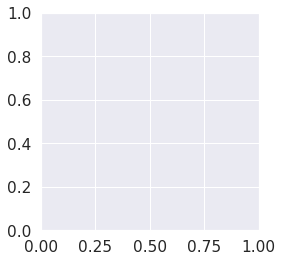

In [ ]:
plt.imshow(X_dataset[2])

#Train Model

In [ ]:
VALIDATION_SPLIT = 0.2

print("Total examples: {:d}\nTraining examples: {:d}\nTest examples: {:d}".
      format(X_dataset.shape[0],
             math.ceil(X_dataset.shape[0] * (1-VALIDATION_SPLIT)),
             math.floor(X_dataset.shape[0] * VALIDATION_SPLIT)))
print("X shape: " + str(X_dataset.shape))
print("Y shape: " + str(Y_dataset.shape))

Total examples: 1592
Training examples: 1274
Test examples: 318
X shape: (1592, 120, 100, 1)
Y shape: (1592, 36)


In [ ]:
from ipywidgets import interact
import ipywidgets as ipywidgets

# Display images in the training data set.
def displayImage(index):
  plt.imshow(X_dataset[index].reshape(120,100))
  caption = ("y = " + str(Y_dataset[index]))#str(np.squeeze(Y_dataset_orig[:, index])))
  plt.text(0.5, 0.5, caption,
           color='orange', fontsize = 20,
           horizontalalignment='left', verticalalignment='top')


interact(displayImage,
         index=ipywidgets.IntSlider(min=0, max=X_dataset.shape[0],
                                    step=1, value=10))

interactive(children=(IntSlider(value=10, description='index', max=1592), Output()), _dom_classes=('widget-int…

<function __main__.displayImage(index)>

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend

In [ ]:
def reset_weights(model):
  for ix, layer in enumerate(model.layers):
      if (hasattr(model.layers[ix], 'kernel_initializer') and
          hasattr(model.layers[ix], 'bias_initializer')):
          weight_initializer = model.layers[ix].kernel_initializer
          bias_initializer = model.layers[ix].bias_initializer

          old_weights, old_biases = model.layers[ix].get_weights()

          model.layers[ix].set_weights([
              weight_initializer(shape=old_weights.shape),
              bias_initializer(shape=len(old_biases))])

In [ ]:
conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                             input_shape=(120, 100, 1)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(512, activation='relu'))
conv_model.add(layers.Dense(36, activation='softmax'))

conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 98, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 10, 128)      0

In [ ]:
LEARNING_RATE = 1e-4
conv_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(lr=LEARNING_RATE),
                   metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
reset_weights(conv_model)

In [ ]:
history_conv = conv_model.fit(X_dataset, Y_dataset,
                              validation_split=VALIDATION_SPLIT,
                              epochs=80,
                              batch_size=16)

Epoch 1/80
80/80 [==============================] - 11s 17ms/step - loss: 3.2744 - acc: 0.1932 - val_loss: 2.8251 - val_acc: 0.5016
Epoch 2/80
80/80 [==============================] - 1s 11ms/step - loss: 1.5391 - acc: 0.6677 - val_loss: 0.8501 - val_acc: 0.7806
Epoch 3/80
80/80 [==============================] - 1s 12ms/step - loss: 0.3322 - acc: 0.9089 - val_loss: 0.1425 - val_acc: 0.9310
Epoch 4/80
80/80 [==============================] - 1s 12ms/step - loss: 0.1549 - acc: 0.9568 - val_loss: 0.0471 - val_acc: 0.9843
Epoch 5/80
80/80 [==============================] - 1s 11ms/step - loss: 0.0993 - acc: 0.9686 - val_loss: 0.0433 - val_acc: 0.9781
Epoch 6/80
80/80 [==============================] - 1s 11ms/step - loss: 0.0818 - acc: 0.9709 - val_loss: 0.0141 - val_acc: 0.9937
Epoch 7/80
80/80 [==============================] - 1s 11ms/step - loss: 0.0933 - acc: 0.9686 - val_loss: 0.0220 - val_acc: 0.9906
Epoch 8/80
80/80 [==============================] - 1s 12ms/step - loss: 0.0743 - 

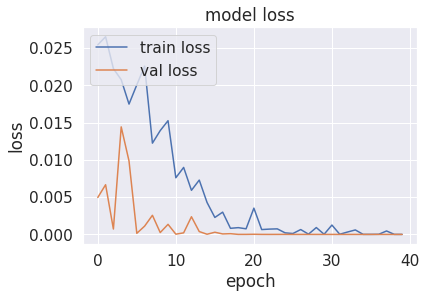

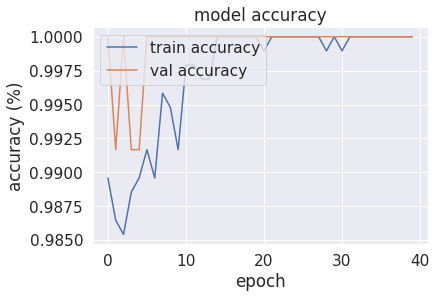

interactive(children=(IntSlider(value=10, description='index', max=1200), Output()), _dom_classes=('widget-int…

<function __main__.displayImage(index)>

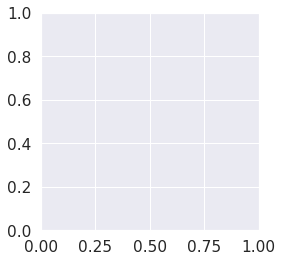

In [ ]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

plt.plot(history_conv.history['acc'])
plt.plot(history_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

# Display images in the training data set.
def displayImage(index):
  img = X_dataset[index]

  img_aug = np.expand_dims(img, axis=0)
  y_predict = conv_model.predict(img_aug)[0]

  plt.imshow(img)
  caption = ("                  Cat | Dog\n"+
             "GND truth: {:.2} | {:.2}\nPredicted: {:.2} | {:.2}".
             format(Y_dataset[index][0], Y_dataset[index][1], y_predict[0], y_predict[1]))
  plt.text(0.5, 0.5, caption,
           color='orange', fontsize = 16,
           horizontalalignment='left', verticalalignment='bottom')


interact(displayImage,
        index=ipywidgets.IntSlider(min=0, max=X_dataset.shape[0],
                                   step=1, value=10))

In [ ]:
from sklearn.metrics import confusion_matrix

predict = []
actual = []
oneHots = conv_model.predict(X_dataset)
# for item in range(0,Y_dataset.shape[0]):
for item in range(0,datasize):
  actual.append(Y_dataset[item].argmax())
  predict.append(oneHots[item].argmax())



# model1 = LogisticRegression()
# model1 = model1.fit(matrix, labels)
# pred = model1.predict(test_matrix)
# cm=metrics.confusion_matrix(test_labels,pred)
# print(cm)
# plt.imshow(cm, cmap='binary')

50/50 [==============================] - 1s 9ms/step


[0, 0, 26, 31, 0, 0, 33, 28, 0, 1, 31, 32, 0, 5, 27, 33, 0, 5, 27, 34, 0, 7, 28, 26, 0, 9, 30, 29, 0, 9, 31, 26, 0, 10, 35, 30, 0, 11, 31, 29, 0, 12, 29, 30, 0, 13, 33, 27, 0, 14, 33, 31, 0, 15, 26, 34, 0, 17, 31, 29, 0, 19, 30, 27, 0, 19, 31, 27, 0, 23, 32, 34, 0, 24, 27, 35, 0, 24, 35, 31, 1, 0, 32, 34, 1, 2, 32, 34, 1, 4, 31, 27, 1, 4, 32, 31, 1, 9, 26, 31, 1, 9, 29, 28, 1, 10, 26, 28, 1, 16, 29, 35, 1, 19, 29, 30, 1, 19, 32, 33, 1, 22, 26, 31, 1, 22, 29, 27, 1, 22, 29, 35, 1, 22, 32, 27, 1, 22, 35, 34, 1, 23, 30, 28, 2, 4, 29, 35, 2, 6, 27, 34, 2, 7, 27, 31, 2, 8, 29, 27, 2, 13, 32, 29, 2, 15, 29, 27, 2, 15, 32, 26, 2, 17, 26, 28, 2, 18, 26, 34, 2, 21, 32, 26, 2, 23, 31, 34, 2, 23, 32, 33, 3, 3, 32, 33, 3, 7, 30, 27, 3, 9, 26, 34, 3, 12, 33, 26, 3, 16, 27, 35, 3, 16, 30, 35, 3, 17, 28, 29, 3, 17, 34, 29, 3, 18, 27, 33, 3, 20, 35, 33, 3, 21, 30, 32, 3, 23, 26, 26, 4, 1, 29, 35, 4, 1, 30, 28, 4, 4, 33, 32, 4, 5, 29, 32, 4, 6, 35, 32, 4, 10, 33, 32, 4, 11, 28, 33, 4, 12, 30, 32, 4, 12

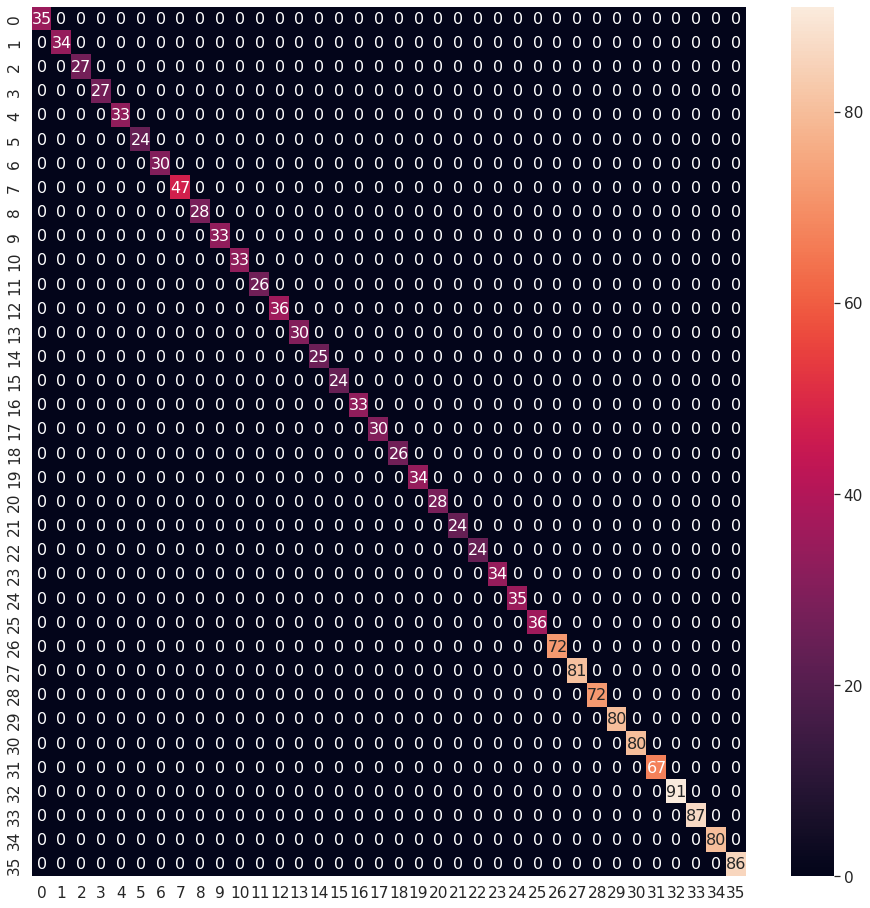

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

print(predict)
print(actual)

confused = confusion_matrix(actual, predict)
df_cm = pd.DataFrame(confused, range(0,36),range(0,36))

# confused = confusion_matrix(actual, predict,labels = ['A', 'B', 'C','D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
# df_cm = pd.DataFrame(confused, index=['A', 'B', 'C','D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],columns=['A', 'B', 'C','D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.figure(figsize=(16,16))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

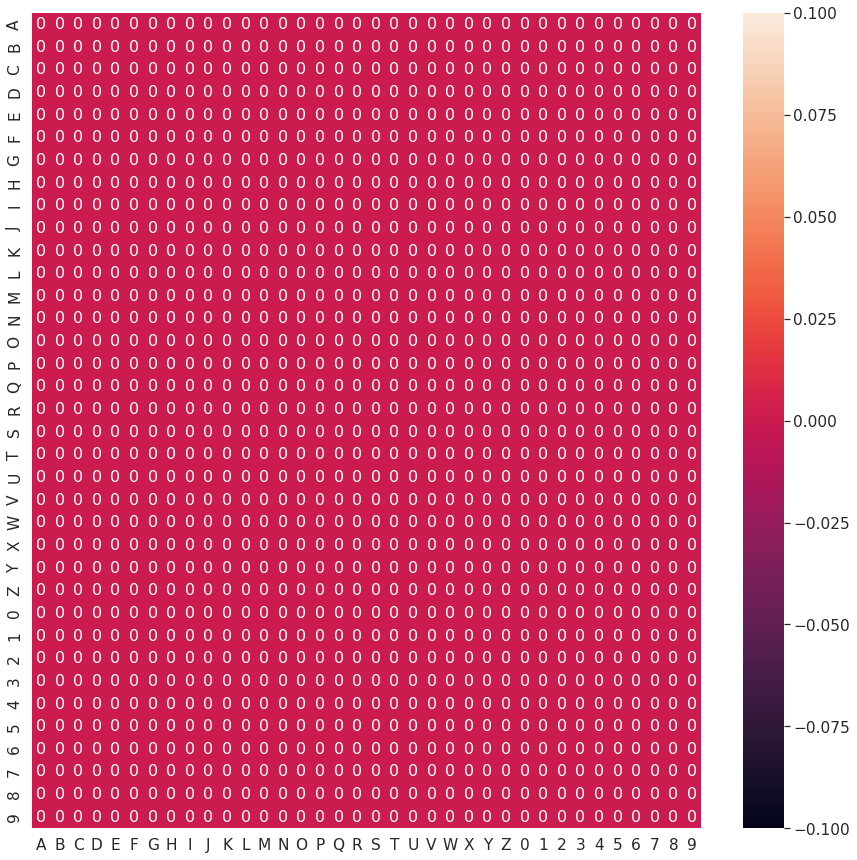

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# plot confusion matrix

matrix = confusion_matrix(actual, predict, labels=['A', 'B', 'C','D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

df_cm = pd.DataFrame(matrix,
                     index=['A', 'B', 'C','D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                     columns=['A', 'B', 'C','D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.figure(figsize=(15,15))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# Verification

In [ ]:
# imports the license plate in grayscale
img = cv2.imread('/content/pictures/plate_QG56.png',cv2.IMREAD_GRAYSCALE)

# create an list to store the characters in that license plate
splitimg = []
# constant determining where to start splitting horizontally
letter_start = 47
# splits the image into parts and stores the characeters in splitimg
for i in range(0,5):
  splitimg.append(img[100:220,letter_start:letter_start+100])
  letter_start += 100
# index 2 contains the BC flag so we remove that, just leaving characters
splitimg.pop(2)

# create a function that maps numbers to characters
def getchar(num):
  if num < 26:
    char = chr(num+65)
  else:
    char = chr(num+22)
  return char

plateNumber = ""

# print(getchar(conv_model.predict((np.asarray(splitimg)/255.0).reshape(4,120,100,-1))[2].argmax()))

oneHotVals = conv_model.predict((np.asarray(splitimg)/255.0).reshape(4,120,100,-1))

for letter in range (0,4):
  plateNumber += getchar(oneHotVals[letter].argmax())

print(plateNumber)

# # creates a string of the file name
# file_name = "/content/pictures/plate_ER49.png"
# plate = []
# for i in range(24,28):
#   plate.append(getArray(file_name[i]))

1/1 [==============================] - 0s 226ms/step
QG56


In [ ]:
# # imports the license plate in grayscale
# img = cv2.imread('/content/pictures/plate_ER49.png',cv2.IMREAD_GRAYSCALE)

# # create an list to store the characters in that license plate
# splitimg = []
# # constant determining where to start splitting horizontally
# letter_start = 47
# # splits the image into parts and stores the characeters in splitimg
# for i in range(0,5):
#   splitimg.append(img[100:220,letter_start:letter_start+100])
#   letter_start += 100
# # index 2 contains the BC flag so we remove that, just leaving characters
# splitimg.pop(2)

# # create a function that converts a character into the corresponding one-hot array
# def getArray(char):
#   if ord(char) > 64:
#     num = ord(char)-65
#   else:
#     num = ord(char)-22

#   array = np.zeros(36)
#   array[num] = 1
#   return array.T

# # creates a string of the file name
# file_name = "/content/pictures/plate_ER49.png"
# plate = []
# for i in range(24,28):
#   plate.append(getArray(file_name[i]))

# # defining splitimg to be X data and plate to by Y data
